In [206]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import hdbscan
import matplotlib.pyplot as plt

In [91]:
dataset = np.load("data/dataset.npy")
hnsw = np.load("data/Distances.npy")

print(dataset.shape)

(120, 1024)


{0: 51, 1: 33, 2: 36}


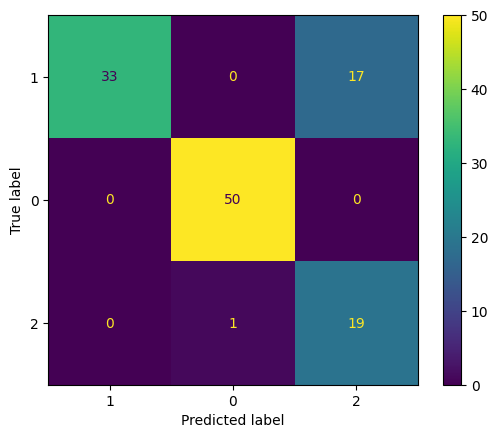

In [188]:
NUM_CLUSTERS = 3
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=123, n_init=25, max_iter=500).fit(dataset)

# Counting the number of elements in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counter = dict(zip(unique, counts))
print(counter)


correct_array = np.concatenate([np.ones(50), np.zeros(50), (np.ones(20)*2)])
# Assuming kmeans.labels_ is your predicted labels
predicted_labels = kmeans.labels_
cm = confusion_matrix(correct_array, predicted_labels, labels=[1, 0, 2])
cmd = ConfusionMatrixDisplay(cm, display_labels=[1, 0, 2])
cmd.plot()
plt.show()

In [189]:
def accuracy_per_class(correct_labels, predicted_labels, labels=["Banana", "ML", "Outlier"]):
    # Calculate accuracy per class
    num_classes = len(np.unique(correct_labels))
    accuracy_per_class = []
    accuracy_per_class = {}
    for class_label in range(num_classes):
        total_samples = np.sum(correct_labels == class_label)
        correct_predictions = np.sum((correct_labels == class_label) & (predicted_labels == class_label))
        accuracy = correct_predictions / total_samples if total_samples > 0 else 0
        accuracy_per_class[labels[class_label]] = accuracy

    return accuracy_per_class


correct_labels = np.concatenate([np.ones(50), np.zeros(50), (np.ones(20)*2)])  # Example correct labels
predicted_labels = kmeans.labels_

class_accuracy = accuracy_per_class(correct_labels, predicted_labels, labels=["ML", "Banana","Outlier"])
print("Accuracy per class:")
for class_label, accuracy in class_accuracy.items():
    print(f"Class {class_label}: {accuracy * 100:.2f}%")

Accuracy per class:
Class ML: 100.00%
Class Banana: 66.00%
Class Outlier: 95.00%


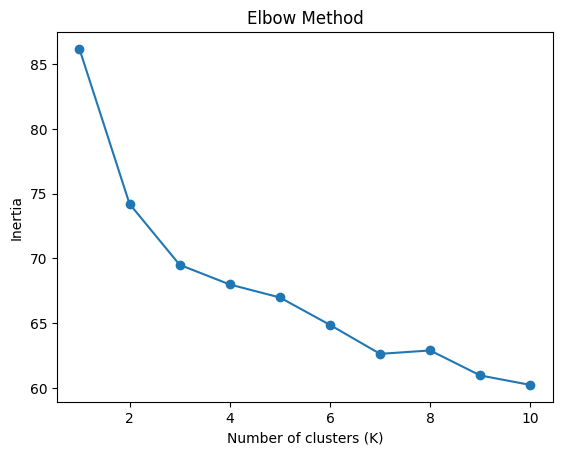

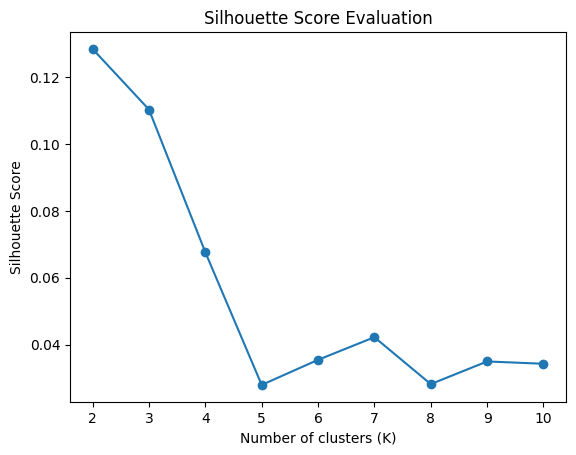

In [207]:
from sklearn.metrics import silhouette_score


def elbow_method(data, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

def silhouette_evaluation(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Evaluation')
    plt.show()

elbow_method(dataset, 10)  # Evaluate up to 10 clusters using the elbow method
silhouette_evaluation(dataset, 10)  # Evaluate up to 10 clusters using silhouette score


In [95]:
eps_range = np.arange(0.1, 2, 0.2)
min_samples = np.arange(2, 50, 3)
for i in eps_range:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j).fit(dataset)
        unique, counts = np.unique(dbscan.labels_, return_counts=True)
        counter = dict(zip(unique, counts))
        print("eps: ", i, " min_samples: ", j, " counter: ", counter)

eps:  0.1  min_samples:  2  counter:  {-1: 120}
eps:  0.1  min_samples:  5  counter:  {-1: 120}
eps:  0.1  min_samples:  8  counter:  {-1: 120}
eps:  0.1  min_samples:  11  counter:  {-1: 120}
eps:  0.1  min_samples:  14  counter:  {-1: 120}
eps:  0.1  min_samples:  17  counter:  {-1: 120}
eps:  0.1  min_samples:  20  counter:  {-1: 120}
eps:  0.1  min_samples:  23  counter:  {-1: 120}
eps:  0.1  min_samples:  26  counter:  {-1: 120}
eps:  0.1  min_samples:  29  counter:  {-1: 120}
eps:  0.1  min_samples:  32  counter:  {-1: 120}
eps:  0.1  min_samples:  35  counter:  {-1: 120}
eps:  0.1  min_samples:  38  counter:  {-1: 120}
eps:  0.1  min_samples:  41  counter:  {-1: 120}
eps:  0.1  min_samples:  44  counter:  {-1: 120}
eps:  0.1  min_samples:  47  counter:  {-1: 120}
eps:  0.30000000000000004  min_samples:  2  counter:  {-1: 120}
eps:  0.30000000000000004  min_samples:  5  counter:  {-1: 120}
eps:  0.30000000000000004  min_samples:  8  counter:  {-1: 120}
eps:  0.30000000000000004  

In [213]:
eps_range = np.arange(0.1, 2, 0.2)
min_samples = np.arange(2, 50, 3)
print(len(eps_range) * len(min_samples))

eps_range = np.arange(1.05, 1.13, 0.01)
min_samples = np.arange(2, 40, 2)

print((len(eps_range) * len(min_samples)) +( len(eps_range) * len(min_samples)))

160
304


In [113]:
eps_range = np.arange(1.05, 1.13, 0.01)
min_samples = np.arange(2, 40, 2)
for i in eps_range:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j).fit(dataset)
        unique, counts = np.unique(dbscan.labels_, return_counts=True)
        counter = dict(zip(unique, counts))
        print("eps: ", i, " min_samples: ", j, " counter: ", counter)

eps:  1.05  min_samples:  2  counter:  {-1: 11, 0: 54, 1: 49, 2: 3, 3: 3}
eps:  1.05  min_samples:  4  counter:  {-1: 18, 0: 53, 1: 49}
eps:  1.05  min_samples:  6  counter:  {-1: 18, 0: 53, 1: 49}
eps:  1.05  min_samples:  8  counter:  {-1: 18, 0: 53, 1: 49}
eps:  1.05  min_samples:  10  counter:  {-1: 18, 0: 53, 1: 49}
eps:  1.05  min_samples:  12  counter:  {-1: 19, 0: 53, 1: 48}
eps:  1.05  min_samples:  14  counter:  {-1: 20, 0: 53, 1: 47}
eps:  1.05  min_samples:  16  counter:  {-1: 22, 0: 53, 1: 45}
eps:  1.05  min_samples:  18  counter:  {-1: 22, 0: 53, 1: 45}
eps:  1.05  min_samples:  20  counter:  {-1: 22, 0: 53, 1: 45}
eps:  1.05  min_samples:  22  counter:  {-1: 25, 0: 53, 1: 42}
eps:  1.05  min_samples:  24  counter:  {-1: 27, 0: 53, 1: 40}
eps:  1.05  min_samples:  26  counter:  {-1: 27, 0: 53, 1: 40}
eps:  1.05  min_samples:  28  counter:  {-1: 27, 0: 53, 1: 40}
eps:  1.05  min_samples:  30  counter:  {-1: 28, 0: 53, 1: 39}
eps:  1.05  min_samples:  32  counter:  {-1: 29

eps:  1.12  min_samples:  38  counter:  {-1: 20, 0: 53, 1: 47}
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
 -1  1  1  1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1]


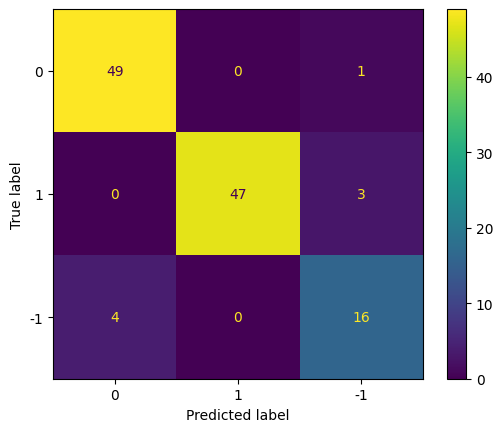

In [191]:
dbscan = DBSCAN(eps=1.05, min_samples=14).fit(dataset)
unique, counts = np.unique(dbscan.labels_, return_counts=True)
counter = dict(zip(unique, counts))
print("eps: ", i, " min_samples: ", j, " counter: ", counter)
dbscan_labels = dbscan.labels_

correct_array = np.concatenate([np.zeros(50), np.ones(50), -np.ones(20)])
# Assuming kmeans.labels_ is your predicted labels
predicted_labels = dbscan_labels

cm = confusion_matrix(correct_array, predicted_labels, labels=[0, 1, -1])
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1, -1])
cmd.plot()
plt.show()

In [203]:

def accuracy_per_class(correct_labels, predicted_labels, labels=["Banana", "ML", "Outlier"]):
    # Calculate accuracy per class
    accuracy_per_class = {}

    for class_label in labels:
        total_samples = np.sum(correct_labels == class_label)
        correct_predictions = np.sum((correct_labels == class_label) & (predicted_labels == class_label))
        if total_samples > 0:
            accuracy = correct_predictions / total_samples
        else:
            accuracy = np.nan  # or any other indicator for zero samples
        accuracy_per_class[class_label] = accuracy

    return accuracy_per_class

# Example usage
correct_labels = np.concatenate([np.zeros(50), np.ones(50), -np.ones(20)])  # Example correct labels
predicted_labels = dbscan_labels

class_accuracy = accuracy_per_class(correct_labels, predicted_labels, labels=[0, 1, -1])
print("Accuracy per class:")
for label, accuracy in class_accuracy.items():
    print(f"Class {label}: {'%.2f' % (accuracy * 100)}%")

Accuracy per class:
Class 0: 98.00%
Class 1: 94.00%
Class -1: 80.00%


{-1: 18, 0: 53, 1: 49}


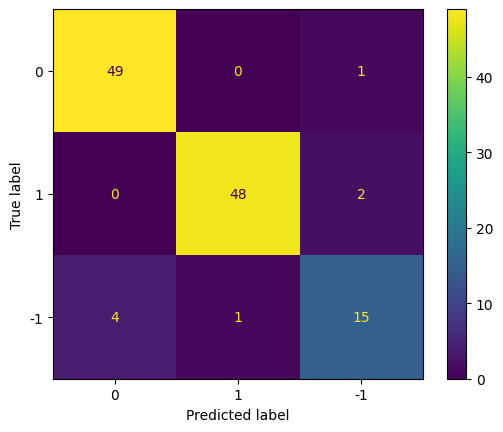

In [204]:
hdbscanner = hdbscan.HDBSCAN()
hdbscanner.fit(dataset)
unique, counts = np.unique(hdbscanner.labels_, return_counts=True)
counter = dict(zip(unique, counts))
print(counter)

correct_array = np.concatenate([np.zeros(50), np.ones(50), -np.ones(20)])
# Assuming kmeans.labels_ is your predicted labels
predicted_labels = hdbscanner.labels_

cm = confusion_matrix(correct_array, predicted_labels, labels=[0, 1, -1])
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1, -1])
cmd.plot()
plt.show()

In [205]:
correct_labels = np.concatenate([np.zeros(50), np.ones(50), -np.ones(20)])  # Example correct labels
predicted_labels = hdbscanner.labels_

class_accuracy = accuracy_per_class(correct_labels, predicted_labels, labels=[0, 1, -1])
print("Accuracy per class:")
for label, accuracy in class_accuracy.items():
    print(f"Class {label}: {'%.2f' % (accuracy * 100)}%")

Accuracy per class:
Class 0: 98.00%
Class 1: 96.00%
Class -1: 75.00%


In [107]:
distances_hnsw = np.load("data/Distances.npy")
print(distances_hnsw.shape)
distances_hnsw_double = distances_hnsw.astype(np.double)

clusterer = hdbscan.HDBSCAN(min_samples=2, min_cluster_size=2, metric='precomputed')
clusterer.fit(distances_hnsw_double)

unique, counts = np.unique(clusterer.labels_, return_counts=True)
counter = dict(zip(unique, counts))

print(counter)
np.round(clusterer.probabilities_,2)

(120, 120)
{-1: 116, 0: 2, 1: 2}


array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])